# Tensorflow 1.x

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define a hello tensor as a tf.constant
hello = tf.constant("Hello, tensorflow")
print(hello)
sess = tf.Session()
print(sess.run(hello))

Tensor("Const_2:0", shape=(), dtype=string)
b'Hello, tensorflow'


In [5]:
sess.run(hello)

b'Hello, tensorflow'

In [7]:
te= tf.constant(3)
tf.shape(te)
tf.rank(te)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

In [8]:
te= tf.constant([1.,2.,3.])
print(te)

Tensor("Const_5:0", shape=(3,), dtype=float32)


In [11]:
te=tf.constant([[1.,2.,3.],[7.,8.,9.],[10,11,12]])
print(te)

Tensor("Const_7:0", shape=(3, 3), dtype=float32)


In [12]:
tf.rank(te)

<tf.Tensor 'Rank_2:0' shape=() dtype=int32>

In [14]:
a= tf.constant ([3.0,2.0], dtype=tf.float32)
b= tf.constant([4.0,5.0])
total =a +b
print(a)
print(b)
print(total)

Tensor("Const_8:0", shape=(2,), dtype=float32)
Tensor("Const_9:0", shape=(2,), dtype=float32)
Tensor("add:0", shape=(2,), dtype=float32)


In [15]:
sess=tf.Session()
sess.run(total)

array([7., 7.], dtype=float32)

In [16]:
x= tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
z = x + y
print(sess.run(z, feed_dict={x:3, y:4.5}))
print(sess.run(z, feed_dict={x:[1,3], y:[4.5,5.5]}))

7.5
[5.5 8.5]


In [2]:
con1= tf.constant(10)
con2= tf.constant(3.14)
con3 = tf.constant("this is")
print([con1,con2,con3])

[<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'Const_1:0' shape=() dtype=float32>, <tf.Tensor 'Const_2:0' shape=() dtype=string>]


In [3]:
sess=tf.Session()
sess.run([con1,con2,con3])

[10, 3.14, b'this is']

In [4]:
Addition = tf.constant(20) +tf.constant(30)
Multiplication = tf.constant(20) * tf.constant(30)

In [5]:
sess.run([Addition, Multiplication])

[50, 600]

In [8]:
Addition = tf.constant([1,2,3,4,5]) +tf.constant([5,4,3,2,1])
Multiplication = tf.constant([1,2,3,4,5]) *tf.constant([5,4,3,2,1])

In [9]:
sess.run([Addition, Multiplication])

[array([6, 6, 6, 6, 6], dtype=int32), array([5, 8, 9, 8, 5], dtype=int32)]

In [10]:
str1 = tf.constant("I love ")
str2 = tf.constant("tensorflow ")
sess.run(str1 + str2)

b'I love tensorflow '

In [11]:
a =tf.placeholder(tf.int32)
b=a*2
sess.run(b,feed_dict={a:[1,2,3,4,5]})

array([ 2,  4,  6,  8, 10], dtype=int32)

In [13]:
str_name= tf.placeholder(tf.string)
my_name= "I am " +str_name
sess.run(my_name, feed_dict= {str_name: ["Sam", "Bob"]})

array([b'I am Sam', b'I am Bob'], dtype=object)

In [14]:
var1 = tf.Variable([20], tf.int32)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(var1)

array([20], dtype=int32)

In [15]:
updated_var1 = tf.assign(var1,[25])
sess.run(updated_var1)

array([25], dtype=int32)

In [16]:
sess.run(var1)

array([25], dtype=int32)

In [17]:
W= tf.Variable([10], tf.int32)
b= tf.Variable([5], tf.int32)
x= tf.placeholder(tf.int32)
linear_model= W*x +b

In [18]:
init1= tf.global_variables_initializer()
sess.run(init1)
sess.run(linear_model, feed_dict={x:[1,2,3,4,5]})

array([15, 25, 35, 45, 55], dtype=int32)

In [19]:
tf.__version__

'1.14.0'

In [20]:
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot= True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
mnist.train.images.shape

(55000, 784)

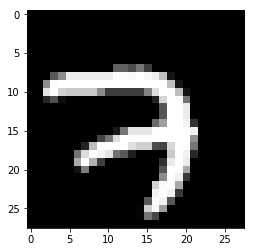

In [30]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap="gray")

In [37]:
x =tf.placeholder(tf.float32, shape=[None, 784])
W= tf.Variable(tf.zeros([784,10]))
b= tf.Variable(tf.zeros([10]))

In [38]:
y= tf.nn.softmax(tf.matmul(x,W)+b)
y_= tf.placeholder(tf.float32, shape =[None, 10])

In [39]:
cross_entropy= tf.reduce_mean(-tf.reduce_sum(y_ - tf.log(y), reduction_indices=[1]))

In [40]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

In [47]:
sess=tf.InteractiveSession()

In [49]:
tf.global_variables_initializer().run()

In [50]:
for i in range(10):
    batch_x, batch_y  = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [51]:
acc= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [52]:
sess.run(acc, feed_dict={x:mnist.test.images, y_:mnist.test.labels})

0.098

In [53]:
sess.close()